<a href="https://colab.research.google.com/github/shaleenanuj/Machine-Condition-Monitoring/blob/shaleen/LSTMPredictiononNASABearing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONDITION MONITORING & PREDICTIVE MAINTENANCE 


<font color="blue">This notebook is intended to illustrate conditioning monitoring of industrial machinery by walking  through a real life dataset of bearing vibration data.</font>








# Imports

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

# Data Import

Data can be imported either by reading the file data and taking average of 10 minutes or can be read out of all ready stored file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###Data read from raw data files
data_dir = 'data'
merged_data = pd.DataFrame()

# Looping over all files from 12th Feb to 19th Feb
for filename in os.listdir(data_dir):
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)
    
# Renaming columns
merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']
# Identifying index as datetime format
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_2.csv')

In [ ]:
merged_data = pd.read_csv('/content/drive/MyDrive/merged_dataset_BearingTest_2.csv')
merged_data.index = pd.to_datetime(merged_data['Unnamed: 0'])
merged_data.drop('Unnamed: 0',axis=1)
merged_data = merged_data.sort_index()

In [ ]:
# Check - Begining of Data
merged_data.head()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
Unnamed: 0,,,,,
2004-02-12 10:32:39,2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [ ]:
# Check - End of Data
merged_data.tail()
#Check Total Points
print(f'Total Data Points {merged_data.shape[0] + 1}')

Total Data Points 985


# Visualising the Data

Text(2004-02-19 06:12:39, 0.3, 'Breakdown of Bearing 1')

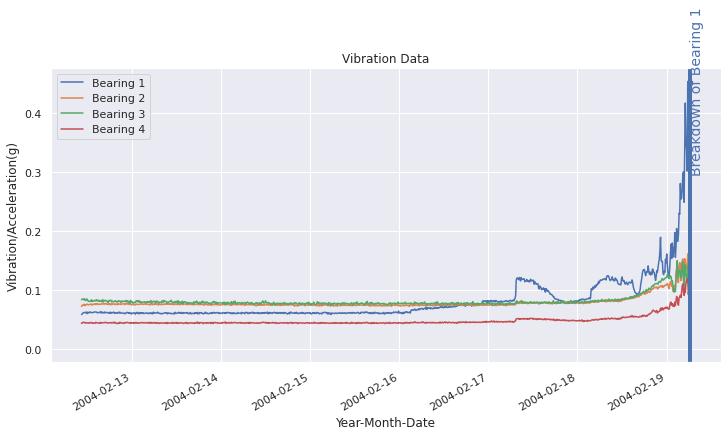

In [ ]:
# Visualising Data
ax = merged_data.plot(figsize = (12,6), title="Vibration Data" , legend = True)
ax.set(xlabel="Year-Month-Date", ylabel="Vibration/Acceleration(g)")
plt.axvline(x='2004-02-19 06:12:39', linewidth=4, color='b', label ="Breakdown of Bearing 1")
plt.text('2004-02-19 06:12:39',0.3,'Breakdown of Bearing 1',rotation=90, fontsize=14, color='b')

In [ ]:
healthy_bearing1 = merged_data['2004-02-12 10:32:39':'2004-02-15 23:42:39']['Bearing 1']

# Creating training dataframe
LSTM_healthy_train = pd.DataFrame()
#LSTM_healthy_train['ds'] = pd.to_datetime(healthy_bearing1.index)
LSTM_healthy_train['y'] = healthy_bearing1.values

LSTM_healthy_train.head()

,y
0,0.058333
1,0.058995
2,0.060236
3,0.061455
4,0.061361


# Creating Training Data Set and model

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(LSTM_healthy_train)
#scaled_LSTM_healthy_train = scaler.transform(LSTM_healthy_train)
scaled_LSTM_healthy_train = LSTM_healthy_train)
#scaled_test = scaler.transform(test)
#print(scaled_LSTM_healthy_train)
from keras.preprocessing.sequence import TimeseriesGenerator
# define generator
n_input = 40
n_features = 1
generator = TimeseriesGenerator(scaled_LSTM_healthy_train, scaled_LSTM_healthy_train, length=n_input, batch_size=1)


X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')



Given the Array: 
[0.00812185 0.14279757 0.39518051 0.64304579 0.62379364 0.68562095
 0.74236467 0.59731324 0.81065571 0.32479447 0.82926248 0.51730609
 0.56876762 0.87550141 0.82304698 0.678492   0.73038048 0.60052027
 0.64728544 0.72190119 0.79710274 0.88101195 0.85829461 0.8771794
 0.84497994 0.61731006 0.64235077 0.60710314 0.73472934 0.73136344
 0.69853846 1.         0.48769808 0.808799   0.65755193 0.65385837
 0.47531673 0.89288693 0.5949998  0.63443743]
Predict this y: 
 [[0.66843401]]


In [125]:


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM



In [126]:


# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [127]:


model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100)               40800     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [128]:


# fit model
model.fit(generator,epochs=50)



Epoch 1/50
472/472 [==============================] - 31s 60ms/step - loss: 0.0321
Epoch 2/50
472/472 [==============================] - 21s 45ms/step - loss: 0.0247
Epoch 3/50
472/472 [==============================] - 18s 39ms/step - loss: 0.0245
Epoch 4/50
472/472 [==============================] - 26s 56ms/step - loss: 0.0239
Epoch 5/50
472/472 [==============================] - 23s 48ms/step - loss: 0.0237
Epoch 6/50
472/472 [==============================] - 22s 46ms/step - loss: 0.0236
Epoch 7/50
472/472 [==============================] - 33s 70ms/step - loss: 0.0236
Epoch 8/50
472/472 [==============================] - 25s 53ms/step - loss: 0.0235
Epoch 9/50
472/472 [==============================] - 24s 51ms/step - loss: 0.0240
Epoch 10/50
472/472 [==============================] - 29s 61ms/step - loss: 0.0237
Epoch 11/50
472/472 [==============================] - 24s 52ms/step - loss: 0.0228
Epoch 12/50
472/472 [==============================] - 33s 71ms/step - loss: 0.0236
E

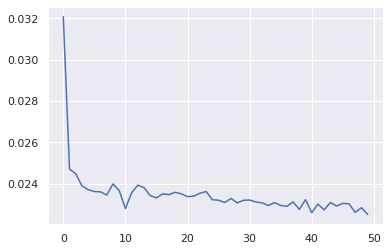

In [129]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

[Text(0, 0.5, 'Vibration/Acceleration(g)'),
 Text(0.5, 0, 'Month (MM)-Date(DD) Time')]

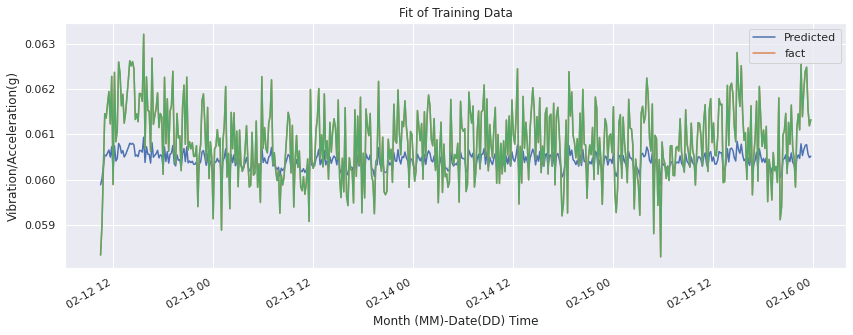

In [130]:

forecast = model.predict(scaled_LSTM_healthy_train)
forecast  = scaler.inverse_transform(forecast)
forecast = pd.DataFrame(forecast)

forecast.rename(columns={0:'Predicted'},inplace=True )
forecast['fact'] = LSTM_healthy_train['y']

forecast.index = healthy_bearing1.index

forecast.head()
#fig1 = model.plot(forecast)
fig1 = forecast.plot(figsize=(14,5))
fig1 = healthy_bearing1.plot(title="Fit of Training Data")
fig1.set(xlabel="Month (MM)-Date(DD) Time", ylabel="Vibration/Acceleration(g)")

Evaluation on test data

In [131]:
faultydata = pd.DataFrame()
faultydata['y'] = merged_data['2004-02-15 23:22:39':'2004-02-16 23:52:39']['Bearing 1']
faultydata.head()

,y
Unnamed: 0,
2004-02-15 23:22:39,0.061558
2004-02-15 23:32:39,0.061188
2004-02-15 23:42:39,0.061323
2004-02-15 23:52:39,0.064163
2004-02-16 00:02:39,0.060751


Displaying Prediction for unseen data plot


[Text(0, 0.5, 'Vibration/Acceleration(g)'),
 Text(0.5, 0, 'Month (MM)-Date(DD) Time')]

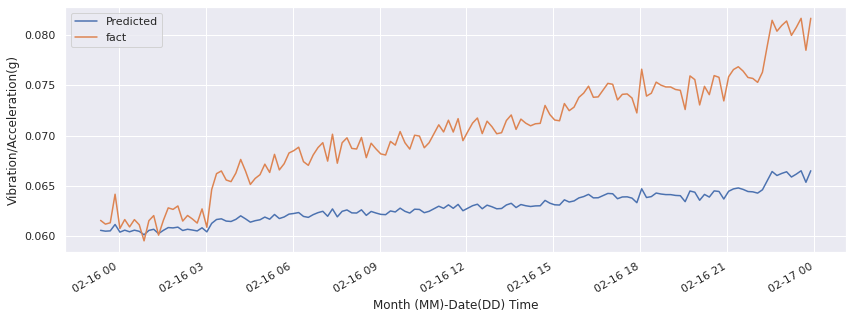

In [132]:
#@title Default title text
faultydata = pd.DataFrame()
faultydata['y'] = merged_data['2004-02-15 23:22:39':'2004-02-16 23:52:39']['Bearing 1']
faultydata.head()

scaled_faultydata = scaler.transform(faultydata)
scaled_faulty_test = pd.DataFrame()


scaled_faulty_test['ds'] = merged_data['2004-02-15 23:22:39':'2004-02-16 23:52:39'].index
#pd.to_datetime(prophet_healthy.index, format='%Y.%m.%d.%H.%M.%S')


scaled_faulty_test['y'] = scaled_faultydata

forecast = model.predict(scaled_faultydata)
forecast  = scaler.inverse_transform(forecast)
forecast = pd.DataFrame(forecast)
forecast.head()
forecast.rename(columns={0:'Predicted'},inplace=True )
forecast.index = faultydata.index
forecast['fact'] = merged_data['2004-02-15 23:22:39':'2004-02-16 23:52:39']['Bearing 1']
forecast.head()
fig1 = forecast.plot(figsize=(14,5))

print('Displaying Prediction for unseen data plot')
#fig1 = m.plot(forecast)
#fig1 = prophet_faultydata.plot(figsize = (12,6),title="Fit of Test/Unseen/Fault Data")
fig1.set(xlabel="Month (MM)-Date(DD) Time", ylabel="Vibration/Acceleration(g)")
#fig1.text(731626.875,0.057,'Expected/Predicted', fontsize=14, color='r')
#fig1.text(731626.875,0.075,'Actual/Faulty Data', fontsize=14, color='r')
#fig1.text(731624.875,0.057,'Actual/Healthy', fontsize=14, color='r')


In [133]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(forecast['fact'],forecast['Predicted']))
print(rmse)

0.008333529211402083


In [ ]:
# Healper functions to annotate the graph.
print(fig1.get_xticks())
print(fig1.get_yticks())

[731624. 731625. 731626. 731627. 731628.]
[0.055 0.06  0.065 0.07  0.075 0.08  0.085]


# References
1.   https://www.plantengineering.com/articles/roller-bearings-and-predictive-analytics/
2.   https://towardsdatascience.com/how-to-use-machine-learning-for-anomaly-detection-and-condition-monitoring-6742f82900d7
3. https://iot.ieee.org/images/files/pdf/phm2017/06-19-2017-Rick-Durham_IEEE-PHM_Presentation20170610.pdf
4. https://facebook.github.io/prophet/docs/quick_start.html
5. https://colab.research.google.com/github/arunptp/Predictive-Analytics/blob/master/BearingAnalytics_.ipynb?authuser=1#scrollTo=U0HbXUA0Sofp